Proyek ini bertujuan untuk melakukan text summarization otomatis terhadap berita-berita mengenai Perum DAMRI dari berbagai sumber daring.
Proses meliputi tahapan scraping data, preprocessing, embedding berbasis MiniLM, serta pembuatan ringkasan (summary) dengan dua pendekatan:

* Semantic Similarity (MiniLM)
* TF-IDF Extractive Summarization

# Data Preparation -> Clean Data

In [1]:
!pip install trafilatura


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Pre-processing

### Data Loading dan Persiapan Awal

In [2]:
import pandas as pd
from time import sleep
import random

In [3]:
input_csv = 'data/damri_article/data_raw/Kelompok1_Link Berita_DAMRI - Data.csv'
output_csv = 'data/damri_article/data_processed/scraped_articles.csv'

df_urls = pd.read_csv(input_csv)
urls = df_urls['link'].dropna().astype(str).tolist()
sources = df_urls['sumber'].dropna().astype(str).tolist()

In [4]:
import re
from bs4 import BeautifulSoup

def clean_text(html_text):
    text = BeautifulSoup(html_text, "html.parser").get_text(separator=" ")
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'Cookies|Setuju|Kebijakan Privasi|Iklan|Advertisement|ADVERTISEMENT|Copyright', '', text, flags=re.IGNORECASE)
    return text.strip()


### Web Scraping Berita Menggunakan Trafilatura

In [5]:
import requests
import trafilatura

def scrape_content(url):
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/120.0.0.0 Safari/537.36"
        )
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code != 200:
            return {
                "url": url,
                "title": None,
                "content": None,
                "error": f"Status code: {response.status_code}"
            }
            
        downloaded = trafilatura.extract(
            response.text,
            include_comments=False,
            include_links=False,
            include_tables=False,
            deduplicate=True,
        )

        if not downloaded or not downloaded.strip():
            return {
                "url": url,
                "title": None,
                "content": None,
                "error": "Konten kosong"
            }

        metadata = trafilatura.extract_metadata(response.text)
        title = metadata.title if metadata and metadata.title else None

        return {
            "url": url,
            "title": title,
            "content": downloaded.strip(),
            "error": None
        }

    except Exception as e:
        return {
            "url": url,
            "title": None,
            "content": None,
            "error": str(e)
        }


### Proses Scraping Secara Batch

In [6]:
results = []
for i, (url, sumber) in enumerate(zip(urls, sources), start=1):
    print(f"[{i}/{len(urls)}] Scraping: {url}")
    data = scrape_content(url)
    data['sumber'] = sumber
    results.append(data)
    sleep(random.uniform(1, 2))

[1/154] Scraping: https://jogjapolitan.harianjogja.com/read/2025/09/20/510/1228835/jadwal-damri-ke-bandara-yia-hari-ini-jogja-purworejo-kebumen
[2/154] Scraping: https://travel.detik.com/travel-news/d-7871241/jadwal-damri-bandara-soekarno-hatta-2025-rute-dan-tarifnya
[3/154] Scraping: https://www.kabarbumn.com/rilis-bumn/116454847/mulai-besok-damri-buka-rute-tanjung-baratbandara-soetta-tarifnya-terjangkau
[4/154] Scraping: https://www.beritatrans.com/artikel/254369/sebanyak-940-ribu-masyarakat-terbantu-mobilisasi-ke-bandara-soekarno-hatta-naik-damri/
[5/154] Scraping: https://metrobanten.co.id/damri-buka-rute-tanjung-barat-bandara-soetta-tarifnya-terjangkau/
[6/154] Scraping: https://www.kompas.tv/info-publik/615445/rute-dan-harga-tiket-damri-ke-bandara-soekarno-hatta-dari-jakarta-mulai-rp60-000
[7/154] Scraping: https://ekonomi.bisnis.com/read/20250129/98/1835381/jadwal-rute-dan-tarif-damri-bandara-soekarno-hatta-2025
[8/154] Scraping: https://www.tempo.co/ekonomi/damri-beri-diskon-ti

In [7]:
df_result = pd.DataFrame(results)
df_result.to_csv(output_csv, index=False, encoding='utf-8-sig')

In [8]:
print(f"Scraping selesai! Hasil disimpan di: {output_csv}")
print(f"Total artikel berhasil: {df_result['content'].notna().sum()} dari {len(df_result)}")


Scraping selesai! Hasil disimpan di: data/damri_article/data_processed/scraped_articles.csv
Total artikel berhasil: 124 dari 154


In [9]:
df_ok = df_result.loc[df_result["error"].isna()]
df_ok["sumber"].unique().tolist()

['Harian Jogja',
 'DetikTravel',
 'beritatrans.com',
 'metrobanten.co.id',
 'Kompas TV',
 'ekonomi.bisnis.com',
 'tempo.co',
 'bisnisnews.id',
 'detiktravel',
 'antaranews.com',
 'detik.news',
 'detik.com',
 'kompas.tv',
 'kompas.com',
 'harianterbit.com',
 'garuda.tv',
 'otodriver.com',
 'bisnis.com',
 'pasbana.com',
 'dutatv.com',
 'mediaindonesia.com',
 'beritasatu.com',
 'idntimes.com',
 'rentak.id',
 'kabarsdgs.com',
 'sekitarbandung.com',
 'kanalkalimantan.com',
 'tempo.com',
 'liputan6.com',
 'bantenraya.com',
 'tangerangraya.id',
 'antranews.com',
 'suarabahana.com',
 'explorebromo.com',
 'travel.detik.com',
 'infopublik.id',
 'traveloka.com',
 'jogjapolitan.harianjogja.com',
 'jatengprov.go.id',
 'rri.co.id',
 'damri.co.id',
 'mojok.com',
 'wartakita.org',
 'news.republika.co.id',
 'jogya.com',
 'indtimes.com',
 'beritakini.co.id',
 'tintapena.id',
 'denpasar.finansialinsight.com',
 'grandwisatabekasi.com',
 'pontianak.beritaenergi.id',
 'beritaterkini.co.id',
 'hariankepri.co

In [10]:
df_error = df_result.loc[df_result["error"].notna()]
df_error["sumber"].unique().tolist()

['kabarbumn.com',
 'bantenraya.com',
 'kabarbandung.com',
 'banyuwangikab.go.id',
 'rri.co.id',
 'medan.insiderindonesia.com',
 'kabar bumn',
 'glints',
 'radio prfm',
 'kota wisata']

In [11]:
df_ok = df_result.loc[df_result["error"].isna()].copy()
df_ok["content_cleaned"] = df_ok["content"].apply(clean_text)

### Pembersihan dan Tokenisasi Teks

In [12]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize

df_ok = df_ok.copy()

df_ok["content_cleaned_tokenize"] = df_ok["content_cleaned"].apply(
    lambda text: sent_tokenize(text) if isinstance(text, str) else []
)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HiliCe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HiliCe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [13]:
df_ok.content_cleaned_tokenize[1]

['- Jadwal Damri Bandara Soekarno Hatta 2025 1.',
 'Stasiun DAMRI Ciputat 2.',
 'Stasiun KA Gambir 3.',
 'Stasiun KCIC Halim 4.',
 'Stasiun DAMRI Kemayoran 5.',
 'Terminal Blok M 6.',
 'Terminal Lebak Bulus 7.',
 'Terminal Pasar Minggu 8.',
 'Terminal Rawamangun 9.',
 'Terminal Kampung Rambutan 10.',
 'Terminal Tanjung Priok 11.',
 'Stasiun DAMRI Merak 12.',
 'Botani Square Bogor 13.',
 'Cibinong City Mall 14.',
 'Mall Kelapa Gading 15.',
 'Intermark BSD 16.',
 'Hollywood Junction Cikarang 17.',
 'Grand Taruma Karawang 18.',
 'Terminal Kayuringin Bekasi Barat 20.',
 'Stasiun DAMRI Purwakarta 21.',
 'Stasiun DAMRI Sukabumi 22.',
 'Transpark Mall Bintaro 23.',
 'Terminal Depok Sawangan 24.',
 'Khalifah Station 25.',
 'Terminal Pulo Gebang 26.',
 'Senayan Park - Cara Pesan Tiket DAMRI Bus DAMRI merupakan Perusahaan Umum Djawatan Angkoetan Motor Repoeblik Indonesia (Perum DAMRI) milik Badan Usaha Milik Negara (BUMN).',
 'DAMRI menyediakan layanan angkutan penumpang, termasuk ke Bandara Soe

## Semantic Embedding dengan MiniLM

In [14]:
from sentence_transformers import SentenceTransformer
import torch

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

df_ok = df_ok.copy()
df_ok["text_for_embedding"] = df_ok["content_cleaned_tokenize"].apply(
    lambda sentences: " ".join(sentences) if isinstance(sentences, list) else str(sentences)
)

texts = df_ok["text_for_embedding"].tolist()
embeddings = model.encode(texts, convert_to_tensor=True, batch_size=16, show_progress_bar=True)

df_ok["embeddings"] = [emb for emb in embeddings]
df_ok[["sumber", "title", "embeddings"]].head()


c:\Users\HiliCe\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Batches: 100%|██████████| 8/8 [00:01<00:00,  7.41it/s]


,sumber,title,embeddings
0,Harian Jogja,"Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-Pu...","[tensor(-0.0294, device='cuda:0'), tensor(0.03..."
1,DetikTravel,"Jadwal DAMRI Bandara Soekarno Hatta 2025, Rute...","[tensor(0.0703, device='cuda:0'), tensor(0.027..."
3,beritatrans.com,Sebanyak 940 Ribu Masyarakat Terbantu Mobilisa...,"[tensor(0.0260, device='cuda:0'), tensor(0.075..."
4,metrobanten.co.id,"DAMRI Buka Rute Tanjung Barat–Bandara Soetta, ...","[tensor(-0.0207, device='cuda:0'), tensor(0.02..."
5,Kompas TV,Rute dan Harga Tiket DAMRI ke Bandara Soekarno...,"[tensor(-0.0157, device='cuda:0'), tensor(0.02..."


In [15]:
import numpy as np

sample_sentences = df_ok.iloc[0]["content_cleaned_tokenize"]
sentence_embeddings = model.encode(sample_sentences, convert_to_tensor=True)
print(sentence_embeddings)

tensor([[-0.0719,  0.0796,  0.0313,  ...,  0.0080, -0.0519, -0.0028],
        [ 0.0158,  0.0976, -0.0229,  ..., -0.0204,  0.0605, -0.0261],
        [ 0.0089,  0.0307, -0.0028,  ...,  0.0504,  0.0027,  0.0514],
        ...,
        [ 0.0104,  0.0135, -0.0431,  ..., -0.0492, -0.1107,  0.0117],
        [-0.0429,  0.0937, -0.0648,  ...,  0.0552, -0.0019, -0.0125],
        [ 0.0395,  0.0485, -0.0070,  ...,  0.0090, -0.0048,  0.0661]],
       device='cuda:0')


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(sentence_embeddings.cpu().numpy())
print(similarity_matrix)

sentence_scores = similarity_matrix.mean(axis=1)


[[1.0000002  0.5365598  0.6917527  0.6470701  0.563067   0.5037868
  0.5624475  0.5276333  0.5038698 ]
 [0.5365598  0.9999999  0.44861263 0.5236146  0.42342898 0.2900779
  0.32908994 0.5852629  0.38948733]
 [0.6917527  0.44861263 1.0000001  0.7002914  0.5852873  0.42488253
  0.46290737 0.5158552  0.5352645 ]
 [0.6470701  0.5236146  0.7002914  1.         0.53840756 0.4154566
  0.55981517 0.6064917  0.4990662 ]
 [0.563067   0.42342898 0.5852873  0.53840756 1.         0.43679118
  0.44893938 0.54449606 0.51360023]
 [0.5037868  0.2900779  0.42488253 0.4154566  0.43679118 1.0000001
  0.74436414 0.40217096 0.40227658]
 [0.5624475  0.32908994 0.46290737 0.55981517 0.44893938 0.74436414
  1.         0.38374305 0.44036025]
 [0.5276333  0.5852629  0.5158552  0.6064917  0.54449606 0.40217096
  0.38374305 0.9999999  0.51336265]
 [0.5038698  0.38948733 0.5352645  0.4990662  0.51360023 0.40227658
  0.44036025 0.51336265 1.0000002 ]]


In [17]:
top_n = 3
top_sentence_indices = np.argsort(sentence_scores)[-top_n:]

top_sentence_indices.sort()

summary = " ".join([sample_sentences[i] for i in top_sentence_indices])
print(summary)


Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-Purworejo-Kebumen  Harianjogja.com, JOGJA—Bus DAMRI adalah pilihan tepat untuk Anda yang ingin menuju ke Bandara YIA. Layanan bus ini menghubungkan YIA dengan berbagai lokasi, termasuk Jogja, Purworejo, dan Kebumen. Layanan transportasi DAMRI ini bisa Anda manfaatkan jika ingin menuju Bandara YIA.


## Extractive Summarization berbasis Semantic Similarity

In [18]:
def summarize_text(sentences, model, top_n=3):
    if not sentences:
        return ""
    embeddings = model.encode(sentences, convert_to_tensor=True)
    sim = cosine_similarity(embeddings.cpu().numpy())
    scores = sim.mean(axis=1)
    top_idx = np.argsort(scores)[-top_n:]
    top_idx.sort()
    return " ".join([sentences[i] for i in top_idx])

df_ok["summary"] = df_ok["content_cleaned_tokenize"].apply(
    lambda sents: summarize_text(sents, model, top_n=3)
)


In [19]:
df_ok.head()

,url,title,content,error,sumber,content_cleaned,content_cleaned_tokenize,text_for_embedding,embeddings,summary
0,https://jogjapolitan.harianjogja.com/read/2025...,"Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-Pu...",Advertisement\nJadwal DAMRI ke Bandara YIA Har...,None,Harian Jogja,"Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-Pu...","[Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-P...","Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-Pu...","[tensor(-0.0294, device='cuda:0'), tensor(0.03...","Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-Pu..."
1,https://travel.detik.com/travel-news/d-7871241...,"Jadwal DAMRI Bandara Soekarno Hatta 2025, Rute...",- Jadwal Damri Bandara Soekarno Hatta 2025 1. ...,None,DetikTravel,- Jadwal Damri Bandara Soekarno Hatta 2025 1. ...,[- Jadwal Damri Bandara Soekarno Hatta 2025 1....,- Jadwal Damri Bandara Soekarno Hatta 2025 1. ...,"[tensor(0.0703, device='cuda:0'), tensor(0.027...",Stasiun DAMRI Kemayoran - Tarif: Rp 80 ribu - ...
3,https://www.beritatrans.com/artikel/254369/seb...,Sebanyak 940 Ribu Masyarakat Terbantu Mobilisa...,Oleh : Ahmad\nJAKARTA (BeritaTrans.com) – DAMR...,None,beritatrans.com,Oleh : Ahmad JAKARTA (BeritaTrans.com) – DAMRI...,[Oleh : Ahmad JAKARTA (BeritaTrans.com) – DAMR...,Oleh : Ahmad JAKARTA (BeritaTrans.com) – DAMRI...,"[tensor(0.0260, device='cuda:0'), tensor(0.075...",Stasiun DAMRI Merak: tarif Rp140 ribu tersedia...
4,https://metrobanten.co.id/damri-buka-rute-tanj...,"DAMRI Buka Rute Tanjung Barat–Bandara Soetta, ...","DAMRI Buka Rute Tanjung Barat–Bandara Soetta, ...",None,metrobanten.co.id,"DAMRI Buka Rute Tanjung Barat–Bandara Soetta, ...","[DAMRI Buka Rute Tanjung Barat–Bandara Soetta,...","DAMRI Buka Rute Tanjung Barat–Bandara Soetta, ...","[tensor(-0.0207, device='cuda:0'), tensor(0.02...","DAMRI Buka Rute Tanjung Barat–Bandara Soetta, ..."
5,https://www.kompas.tv/info-publik/615445/rute-...,Rute dan Harga Tiket DAMRI ke Bandara Soekarno...,"JAKARTA, KOMPAS.TV - Jawatan Angkutan Motor Re...",None,Kompas TV,"JAKARTA, KOMPAS.TV - Jawatan Angkutan Motor Re...","[JAKARTA, KOMPAS.TV - Jawatan Angkutan Motor R...","JAKARTA, KOMPAS.TV - Jawatan Angkutan Motor Re...","[tensor(-0.0157, device='cuda:0'), tensor(0.02...",Tiket transportasi DAMRI dari Jakarta ke Banda...


In [20]:
df_ok[["url", "title", "content", "summary"]].to_csv("data/data_processed/data_extraction_minilm_summary.csv", sep=";")

OSError: Cannot save file into a non-existent directory: 'data\data_processed'

## TF-IDF Based Summarization

In [21]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

nltk.download('punkt', quiet=True)

def tfidf_summarize(text, num_sentences=3):
    if not isinstance(text, str) or text.strip() == "":
        return ""
    
    text = clean_text(text)
    sentences = nltk.sent_tokenize(text)
    if len(sentences) == 0:
        return ""
    if len(sentences) <= num_sentences:
        return " ".join(sentences)

    clean_sentences = [
        re.sub(r'\s+', ' ', re.sub(r'[^a-zA-Z0-9.,!? ]', '', s)).strip()
        for s in sentences
    ]

    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(clean_sentences)
    sentence_scores = tfidf_matrix.sum(axis=1).A1

    top_indices = np.argsort(sentence_scores)[-num_sentences:]
    top_indices.sort()

    summary = " ".join([sentences[i] for i in top_indices])
    summary = re.sub(r'\s+', ' ', summary).strip()
    return summary

df_ok["tf_idf_summary"] = df_ok["content"].apply(lambda x: tfidf_summarize(x, num_sentences=3))

df_ok[["url", "title", "tf_idf_summary"]].head()


,url,title,tf_idf_summary
0,https://jogjapolitan.harianjogja.com/read/2025...,"Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-Pu...",BACA JUGA: Rute Uji Coba Bus Listrik Berikut a...
1,https://travel.detik.com/travel-news/d-7871241...,"Jadwal DAMRI Bandara Soekarno Hatta 2025, Rute...",Senayan Park - Cara Pesan Tiket DAMRI Bus DAMR...
3,https://www.beritatrans.com/artikel/254369/seb...,Sebanyak 940 Ribu Masyarakat Terbantu Mobilisa...,"Purwakarta dengan presentase 9,13 persen dari ..."
4,https://metrobanten.co.id/damri-buka-rute-tanj...,"DAMRI Buka Rute Tanjung Barat–Bandara Soetta, ...",“Dengan kapasitas yang pas dan fasilitas yang ...
5,https://www.kompas.tv/info-publik/615445/rute-...,Rute dan Harga Tiket DAMRI ke Bandara Soekarno...,Menurut keterangan yang dirilis akun Instagram...


In [24]:
df_ok[["url", "title", "content", "tf_idf_summary"]].to_csv("data\damri_article\data_processed\data_extraction_minilm_summary.csv", sep=";")
df_ok.to_csv("data\damri_article\data_processed\data_extraction_summary[full].csv", sep=";")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HiliCe\AppData\Local\Temp\ipykernel_8532\3417827179.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_ok[["url", "title", "content", "tf_idf_summary"]].to_csv("data\damri_article\data_processed\data_extraction_minilm_summary.csv", sep=";")
C:\Users\HiliCe\AppData\Local\Temp\ipykernel_8532\3417827179.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_ok.to_csv("data\damri_article\data_processed\data_extraction_summary[full].csv", sep=";")


In [25]:
print(df_ok.summary[0])
print(df_ok.tf_idf_summary[0])

Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-Purworejo-Kebumen  Harianjogja.com, JOGJA—Bus DAMRI adalah pilihan tepat untuk Anda yang ingin menuju ke Bandara YIA. Layanan bus ini menghubungkan YIA dengan berbagai lokasi, termasuk Jogja, Purworejo, dan Kebumen. Layanan transportasi DAMRI ini bisa Anda manfaatkan jika ingin menuju Bandara YIA.
BACA JUGA: Rute Uji Coba Bus Listrik Berikut adalah informasi lengkap mengenai jadwal dan tarif bus DAMRI untuk keberangkatan 20 September 2025. Keberangkatan dari Yogyakarta (Jogja) Sleman City Hall ke Bandara YIA Pukul 07.00 WIB-19.00 WIB Harga tiket Rp80.000 Berangkat setiap 60 menit, tiket tidak dapat dilakukan refund atau reschedule Terminal Condongcatur ke Bandara YIA Pukul 04.00 WIB-15.00 WIB Harga tiket Rp80.000 Berangkat setiap 60 menit, tiket tidak dapat dilakukan refund atau reschedule Pool Damri Yogyakarta ke Bandara YIA Pukul 04.00 WIB-12.00 WIB Harga tiket Rp80.000 Tiket tidak dapat dilakukan refund atau reschedule Park and Ride Gampin

# Sentiment Exploration

## Data Preparation

### Load Dataset

In [28]:
path_guess = "data\damri_article\data_processed\data_extraction_summary[full].csv"
df = pd.read_csv(path_guess, delimiter=";", engine="python", on_bad_lines="skip")

df['summary'] = df['summary'].astype(str).str.strip()
print('Dataset loaded. Rows:', len(df))
df.head(3)

Dataset loaded. Rows: 124


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HiliCe\AppData\Local\Temp\ipykernel_8532\3205216522.py:1: SyntaxWarning: invalid escape sequence '\d'
  path_guess = "data\damri_article\data_processed\data_extraction_summary[full].csv"


,Unnamed: 0,url,title,content,error,sumber,content_cleaned,content_cleaned_tokenize,text_for_embedding,embeddings,summary,tf_idf_summary
0,0,https://jogjapolitan.harianjogja.com/read/2025...,"Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-Pu...",Advertisement\nJadwal DAMRI ke Bandara YIA Har...,NaN,Harian Jogja,"Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-Pu...","['Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-...","Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-Pu...","tensor([-2.9408e-02, 3.5589e-02, 4.4740e-03,...","Jadwal DAMRI ke Bandara YIA Hari Ini, Jogja-Pu...",BACA JUGA: Rute Uji Coba Bus Listrik Berikut a...
1,1,https://travel.detik.com/travel-news/d-7871241...,"Jadwal DAMRI Bandara Soekarno Hatta 2025, Rute...",- Jadwal Damri Bandara Soekarno Hatta 2025 1. ...,NaN,DetikTravel,- Jadwal Damri Bandara Soekarno Hatta 2025 1. ...,['- Jadwal Damri Bandara Soekarno Hatta 2025 1...,- Jadwal Damri Bandara Soekarno Hatta 2025 1. ...,"tensor([ 7.0316e-02, 2.7514e-02, -4.6359e-02,...",Stasiun DAMRI Kemayoran - Tarif: Rp 80 ribu - ...,Senayan Park - Cara Pesan Tiket DAMRI Bus DAMR...
2,3,https://www.beritatrans.com/artikel/254369/seb...,Sebanyak 940 Ribu Masyarakat Terbantu Mobilisa...,Oleh : Ahmad\nJAKARTA (BeritaTrans.com) – DAMR...,NaN,beritatrans.com,Oleh : Ahmad JAKARTA (BeritaTrans.com) – DAMRI...,['Oleh : Ahmad JAKARTA (BeritaTrans.com) – DAM...,Oleh : Ahmad JAKARTA (BeritaTrans.com) – DAMRI...,"tensor([ 2.5951e-02, 7.4954e-02, -7.3483e-02,...",Stasiun DAMRI Merak: tarif Rp140 ribu tersedia...,"Purwakarta dengan presentase 9,13 persen dari ..."


### Labeling (Keyword-base)

In [32]:
label_keywords = {
    "jadwal": ["jadwal", "berangkat", "keberangkatan", "waktu", "operasional", "pukul", "beroperasi"],
    "rute": ["rute", "trayek", "jalur", "pemberhentian", "melayani", "ke"],
    "harga": ["harga", "tiket", "tarif", "biaya", "rp", "promo", "diskon", "gratis"],
    "layanan": ["layanan", "fasilitas", "kenyamanan", "armada", "pembayaran", "aplikasi", "pelayanan"],
    "umum": ["damri", "mobilisasi", "masyarakat", "program", "dukungan", "pengumuman"]
}

def label_aspek_informasi(text):
    t = str(text).lower()
    scores = {k:0 for k in label_keywords}
    for k, kws in label_keywords.items():
        for kw in kws:
            if kw in t:
                scores[k] += 1
    best = max(scores, key=lambda x: scores[x])
    return best if scores[best] > 0 else "umum"

df['aspek_informasi_auto'] = df['summary'].apply(label_aspek_informasi)
print(df['aspek_informasi_auto'].value_counts())

# Save for manual checking
df.to_csv("data/damri_article/data_processed/data_extraction_labeled_auto.csv", index=False)
print("Saved auto-labeled CSV to /mnt/data/data_extraction_labeled_auto.csv")

aspek_informasi_auto
jadwal     66
rute       31
harga      10
layanan     9
umum        8
Name: count, dtype: int64
Saved auto-labeled CSV to /mnt/data/data_extraction_labeled_auto.csv


### Review

In [34]:
import os
review_path = "data/damri_article/data_processed/data_extraction_labeled_reviewed.csv"
if os.path.exists(review_path):
    df = pd.read_csv(review_path, engine="python", on_bad_lines="skip")
    print("Loaded reviewed labels.")
else:
    print("No reviewed file found; using auto labels.")

No reviewed file found; using auto labels.


## Augmentation

In [35]:
import random

syn_lex = {
    "harga": ["tarif","biaya","ongkos"],
    "tiket": ["karcis","tiket perjalanan"],
    "berangkat": ["berlepas","mulai berangkat"],
    "layanan": ["pelayanan","service"],
    "fasilitas": ["sarana","prasarana"],
    "armada": ["kendaraan","bus"],
    "gratis": ["bebas biaya"],
    "rute": ["jalur","trayek"]
}

def synonym_replace(text, n_repl=1):
    words = text.split()
    if not words: return text
    idxs = list(range(len(words)))
    random.shuffle(idxs)
    for i in idxs:
        w = words[i].lower().strip('.,;:?!')
        if w in syn_lex:
            words[i] = random.choice(syn_lex[w])
            break
    return " ".join(words)

def random_deletion(text, p=0.1):
    words = text.split()
    new_words = [w for w in words if random.random() > p]
    return " ".join(new_words) if new_words else text

def random_swap(text):
    words = text.split()
    if len(words) < 2: return text
    i, j = random.sample(range(len(words)), 2)
    words[i], words[j] = words[j], words[i]
    return " ".join(words)

def augment_text(text):
    return [synonym_replace(text), random_deletion(text), random_swap(text)]

# Build augmented dataset
min_samples_per_class = 20
label_col = 'aspek_informasi_auto'
aug_rows = []

for label, group in df.groupby(label_col):
    count = len(group)
    if count >= min_samples_per_class:
        continue
    needed = min_samples_per_class - count
    samples = group['summary'].tolist()
    i = 0
    while needed > 0:
        src = samples[i % len(samples)]
        for aug in augment_text(src):
            new_row = group.iloc[0].copy()
            new_row['summary'] = aug
            new_row[label_col] = label
            aug_rows.append(new_row)
            needed -= 1
            if needed <= 0: break
        i += 1

df_augmented = pd.concat([df, pd.DataFrame(aug_rows)], ignore_index=True)
print("Label distribution after augmentation:")
print(df_augmented[label_col].value_counts())
df_augmented.to_csv("data/damri_article/data_processed/data_extraction_labeled_augmented.csv", index=False)

Label distribution after augmentation:
aspek_informasi_auto
jadwal     66
rute       31
harga      20
layanan    20
umum       20
Name: count, dtype: int64


## Baseline Model 
TF-IDF + Naive Bayes & Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

X = df_augmented['summary']
y = df_augmented[label_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=5000)),
    ('clf', MultinomialNB())
])

pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

print("Training Naive Bayes...")
pipe_nb.fit(X_train, y_train)

print("Training Logistic Regression...")
pipe_lr.fit(X_train, y_train)

# Evaluation
y_pred_nb = pipe_nb.predict(X_test)
y_pred_lr = pipe_lr.predict(X_test)

print("\n=== MultinomialNB ===")
print(classification_report(y_test, y_pred_nb, digits=4))

print("\n=== LogisticRegression ===")
print(classification_report(y_test, y_pred_lr, digits=4))

Training Naive Bayes...
Training Logistic Regression...

=== MultinomialNB ===
              precision    recall  f1-score   support

       harga     1.0000    0.5000    0.6667         4
      jadwal     0.5600    1.0000    0.7179        14
     layanan     1.0000    0.2500    0.4000         4
        rute     1.0000    0.1667    0.2857         6
        umum     1.0000    0.7500    0.8571         4

    accuracy                         0.6562        32
   macro avg     0.9120    0.5333    0.5855        32
weighted avg     0.8075    0.6562    0.6082        32


=== LogisticRegression ===
              precision    recall  f1-score   support

       harga     1.0000    0.5000    0.6667         4
      jadwal     0.6364    1.0000    0.7778        14
     layanan     1.0000    0.7500    0.8571         4
        rute     1.0000    0.3333    0.5000         6
        umum     1.0000    0.7500    0.8571         4

    accuracy                         0.7500        32
   macro avg     0.9273 

## Check Visualization

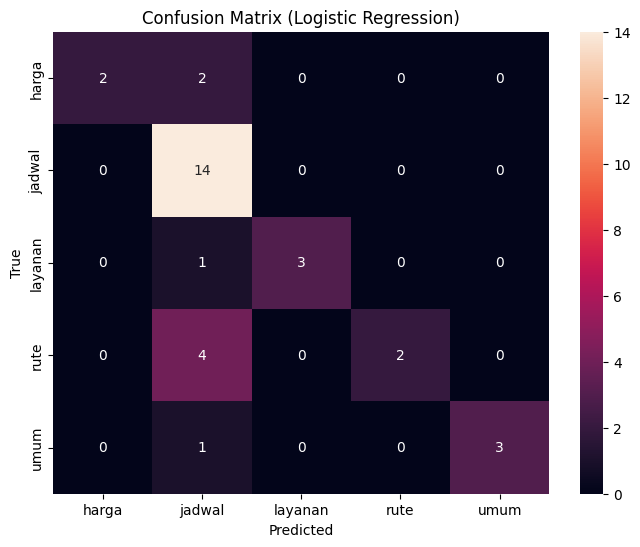

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels_sorted = sorted(df_augmented[label_col].unique())
cm = confusion_matrix(y_test, y_pred_lr, labels=labels_sorted)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels_sorted, yticklabels=labels_sorted)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()